# Lab 5: Resampling and the Bootstrap

Welcome to Lab 5!

We will attempt to estimate the number `N`, a *population parameter*, that represents the number of elements in a population. We get to observe a uniform random sample of the elements, and for each one we can observe its serial number (from 1 to `N`). All elements are labeled with consecutive serial numbers from 1 to `N`, so `N` is the total number of elements. 

Given *just* a random sample of elements, we'll estimate `N`, and then we'll use simulation to find a confidence interval around our estimate, all without ever looking at the whole population.  This is an example of *statistical inference*.

As usual, **run the cell below** to prepare the lab and the automatic tests.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', UserWarning)

# Don't change this cell; just run it. 
from okgrade import grade

## 1. Preliminaries
The setup: We want to know the number of elements in the population.  That number is `N`.  Each element is numbered from 1 to `N`.

We only see a small number of elements (assumed to be a uniform random sample with replacement from among all the elements), so we have to use estimation.

#### Question 1.1
Is `N` a population parameter or a statistic?  If we compute a number using our random sample that's an estimate of `N`, is that a population parameter or a statistic?

parameter, statistic

Check your answer by posting on the discussion forum.

To make the situation realistic, we're going to hide the true number of elements from you.  You'll have access only to this random sample:

In [2]:
observations = Table.read_table("serial_numbers.csv")
num_observations = observations.num_rows
observations

serial number
47
42
57
79
26
23
36
64
83
135


#### Question 1.2
Define a function named `plot_serial_numbers` to make a histogram of any table of serial numbers.  It should take one argument, a table like `observations` with one column called `"serial number"`.  It should plot a histogram of the values in the column **using bins of width 1** ranging from **1 to 200** but return nothing.  Then, call that function to make a histogram of `observations`.

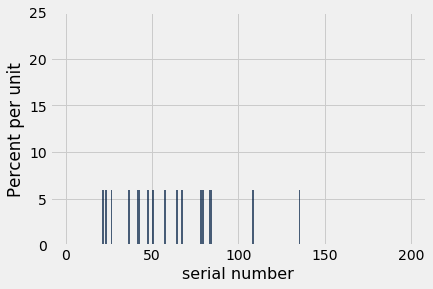

In [3]:
def plot_serial_numbers(numbers):
    numbers.hist(bins=np.arange(1,200,1))
    
    # Assuming the lines above produce a histogram, this next
    # line may make your histograms look nicer.  Feel free to
    # delete it if you want.
    plt.ylim(0, .25)

plot_serial_numbers(observations)

#### Question 1.3
By looking at the histogram, what can we say about `N` immediately? (Hint: What is the relationship between `N` and the largest serial number in `observations`?) What does each little bar in the histogram represent? Why are all the bars the same height?

We can immediately say that N is most likely a value larger than the on erepresented by the bar that is the farthest to the right on the graph. Each bar represents a serial number that was observed. All the bars are the same height because none of the serial numbers were recorded more than once.

#### Question 1.4
One way to estimate `N` is to take twice the mean of the serial numbers we observe. Write a function that computes that statistic.  It should take as its argument an array of serial numbers and return twice their mean.  Call it `mean_based_estimator`.  

After that, use it to compute an estimate of `N` called `mean_based_estimate`.

In [4]:
def mean_based_estimator(nums):
    ans = 2 * np.average(nums)
    print(ans) # added this line so that I can reference the value for a later question
    
mean_based_estimate = mean_based_estimator(observations.column(0))
mean_based_estimate

122.47058823529412


In [5]:
grade('tests/q1_4.py')

#### Question 1.5
We can also estimate `N` using the biggest serial number in the sample.  Compute it, giving it the name `max_estimate`.

In [6]:
max_estimate = max(observations.column(0))
max_estimate

135

In [7]:
grade('tests/q1_5.py')

#### Question 1.6
Look at the values of `max_estimate` and `mean_based_estimate` that we happened to get for our dataset.  The value of `max_estimate` tells you something about `mean_based_estimate`.  For these specific values, is it possible for our value  of `mean_based_estimate` to be equal to `N` (at least, if we round it to the nearest integer)?  If not, is it definitely higher, definitely lower, or can we not tell?  Can you make a statement like the value of our "`mean_based_estimate` is at least *[fill in a number]* away from `N`"?

The mean based estimate yeils ~122 while the max estimate gives 135. The value of max estimate shows that the mean_based_estimate is most likely an underestimate. Mean can't be equal to N for these specific values even if we round it to the nearest integer (which in this case is 122). The mean is lower than the value of N. The mean_based_estimate is at least 10 away from N (using an unrounded value of mean as 122.4...) and the max of 135 as a possible value for N.

Check your answer by posting on the discussion forum.

We can't just confidently proclaim that `max_estimate` or `mean_based_estimate` is equal to `N`.  What if we're really far off?  So we want to get a sense of the accuracy of our estimates.

## 2. Resampling
To do this, we'll use resampling.  That is, we won't exactly simulate new observations.  Rather we sample from our current sample, or "resample" the data.

Why does that make any sense?

When we tried to estimate `N`, we would have liked to use the whole population.  Since we had only a sample, we used that to estimate `N` instead.

This time, we would like to use the population of serial numbers to *run a simulation* about estimates of `N`.  But we still only have our sample.  We use our sample in place of the population to run the simulation.

So there is a simple analogy between estimating `N` and simulating the variability of estimates.

$$\text{computing }N\text{ from the population}$$
$$:$$
$$\text{computing an estimate of }N\text{ from a sample}$$

$$\text{as}$$

$$\text{simulating the distribution of estimates of }N\text{ using samples from the population}$$
$$:$$
$$\text{simulating an (approximate) distribution of estimates of }N\text{ using resamples from a sample}$$

#### Question 2.1
Write a function called `simulate_resample`.  It should generate a resample from the observed serial numbers in `observations` and return that resample.  (The resample should be a table like `observations`.)  It should take no arguments.

In [8]:
def simulate_resample():
    return observations.sample(num_observations)

Let's make one resample.

In [9]:
# This line is a little magic to make sure that you see the same results
# we did.
np.random.seed(123)

one_resample = simulate_resample()
one_resample

serial number
108
57
57
36
41
42
47
50
135
47


In [10]:
grade('tests/q2_1.py')

Later, we'll use many resamples at once to see what estimates typically look like.  We don't often pay attention to single resamples, so it's easy to misunderstand them.  Let's examine some individual resamples before we start using them.

#### Question 2.2
In preparation for answering the next question, generate a histogram of your resample using the plotting function you defined earlier in this lab, **and** generate a separate histogram of the original observations.

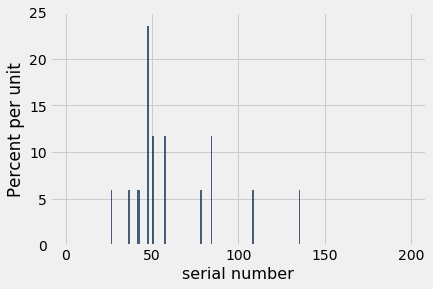

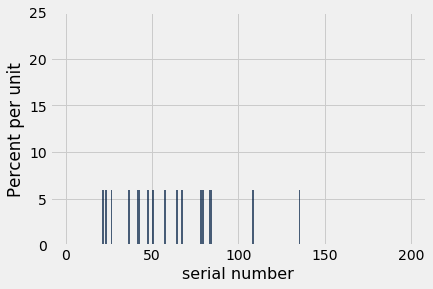

In [11]:
plot_serial_numbers(one_resample)
plot_serial_numbers(observations)

#### Question 2.3
Which of the following are true:
1. In the plot of the resample, there are no bars at locations that weren't there in the plot of the original observations.
2. In the plot of the original observations, there are no bars at locations that weren't there in the plot of the resample.
3. The resample has exactly one copy of each serial number.
4. The sample has exactly one copy of each serial number.

Assign true_statements to a list of the correct statements.

In [12]:
true_statements = [1, 4]

In [13]:
grade('tests/q2_3.py')

#### Question 2.4
Create two more resamples using the function `simulate_resample` from above. For each resampled data, plot it and compute its max- and mean-based estimates.

128.8235294117647
Mean-based estimate for resample 0: None
Max-based estimate for resample 0: 135
106.82352941176471
Mean-based estimate for resample 1: None
Max-based estimate for resample 1: 108


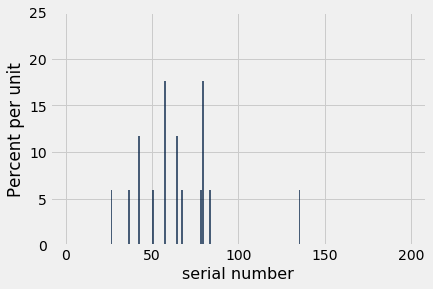

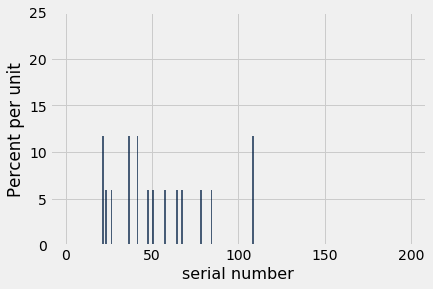

In [14]:
resample_0 = simulate_resample()
plot_serial_numbers(resample_0) 
mean_based_estimate_0 = mean_based_estimator(resample_0.column("serial number")) 
max_based_estimate_0 = max(resample_0.column("serial number")) 
print("Mean-based estimate for resample 0:", mean_based_estimate_0) 
print("Max-based estimate for resample 0:", max_based_estimate_0) 

resample_1 = simulate_resample() 
plot_serial_numbers(resample_1) 
mean_based_estimate_1 = mean_based_estimator(resample_1.column("serial number"))
max_based_estimate_1 = max(resample_1.column("serial number")) 
print("Mean-based estimate for resample 1:", mean_based_estimate_1) 
print("Max-based estimate for resample 1:", max_based_estimate_1)

You may find that the max-based estimates from the resamples are both exactly 135.  You will probably find that the two mean-based estimates do differ from the sample mean-based estimate (and from each other).

#### Question 2.5
Using probability that you've learned, compute the exact chance that a max-based estimate from *one* resample is 135.

Using your intuition, explain why a mean-based estimate from a resample is less often exactly equal to the mean-based estimate from the original sample as compared to a max-based estimate.

As a refresher, here are some rules of probability that may be helpful:

- When all outcomes are equally likely: P(event happens) $=$ $\frac{\text{# outcomes that make event happen}}{\text{# of all outcomes}}$

- When an event can happen in 2 ways: P(event) $=$ P(event happening first way) $+$ P(event happening second way)

- When 2 events must both happen: P(2 events both happen) $=$ P(one event happens) $*$ P(other event happens, given the first one happened)

- When an event doesn't happen: P(event doesn't happen) $=$ 1 $-$ P(event does happen)

- P(at least one success) $= 1 - $ P(no successes)

A resample that includes the greatest value in the sample (135) will have the same max based estimate. Each sample has 17 events so the probability of getting it is 1 - P(don't get 135) = 1 - 16^7 / 17^7

In [16]:
1-(16**17/17**17)

0.6432138052537072

Discuss your answers on the edX discussion forums.  If you have difficulty with the probability calculation, ask for help; don't stay stuck on it for too long.

## 3. Simulating with resampling

**Note**: *The last part of this lab is difficult to check automatically, so it will not be graded. We strongly suggest that you try to complete it. We will release solutions to this lab so that you can compare to them.*

Since resampling from a sample is very similar to sampling from a population, the code should look almost the same.  That means we can write a function that simulates either sampling from a population or resampling from a sample.  If we pass it a population as its argument, it will do the former; if we pass it a sample, it will do the latter.

#### Question 3.1
Write a function called `simulate_estimates`.  It should take 4 arguments:
1. A table from which the data should be sampled.  The table will have 1 column named `"serial number"`.
2. The size of each sample from that table, an integer.  (For example, to do resampling, we would pass for this argument the number of rows in the table.)
3. A function that computes a statistic of a sample.  This argument is a *function* that takes an array of serial numbers as its argument and returns a number.
4. The number of replications to perform.

It should simulate many samples with replacement from the given table.  (The number of samples is the 4th argument.)  For each of those samples, it should compute the statistic on that sample. Then it should return an array containing each of those statistics.  The code below provides an example use of your function and describes how you can verify that you've written it correctly.

**Hint**: Your implementation should contain the following line, which extracts the "serial number" column from some table ``t`` and calls the `statistic` function on it, storing the result in the name `s`.

``s = statistic(t.column("serial number"))``

973.92
945.08
818.32
1045.96
1142.24
866.24
913.64
1110.84
867.56
1067.6
1046.68
966.16
1083.72
987.32
1138.08
1185.44
911.36
1184.0
841.16
1046.08
930.04
862.2
1013.4
1014.36
1124.68
987.4
1069.64
1155.96
1077.88
916.56
802.96
1033.64
1114.88
963.6
1107.92
895.68
1032.72
1039.2
953.4
1028.68
1063.68
980.92
939.4
960.76
1123.36
962.08
1107.2
924.88
969.2
1031.04
899.2
926.88
1069.52
991.84
968.12
1053.48
1098.8
955.64
1066.64
875.44
1174.36
916.76
987.92
1020.32
970.52
1097.96
975.64
1010.48
852.92
920.32
1020.96
990.56
1011.76
893.76
1055.6
961.52
967.32
1008.56
923.0
980.64
936.96
1115.88
939.6
1064.84
1033.44
1106.16
1055.08
961.6
941.44
1013.72
1074.32
1025.8
991.36
850.24
991.92
1084.56
958.96
914.8
987.28
1081.72
1168.64
942.52
898.16
1025.72
944.36
1023.24
939.84
1103.8
879.4
945.88
956.6
993.16
908.88
1204.16
1051.72
927.92
970.24
1089.64
954.0
939.72
1058.84
964.8
991.68
1044.04
1153.52
1018.68
847.96
1016.88
1000.44
1129.56
950.72
1000.92
1009.68
998.92
1031.28
956.2
945.4
10

1105.16
1049.92
910.56
1099.12
989.36
993.56
906.92
986.84
1073.28
935.52
970.36
1004.08
952.76
1197.32
1086.84
1024.72
873.6
944.12
1018.92
997.0
936.64
1041.48
1078.4
1036.48
1027.04
1080.72
918.64
872.6
1036.36
1070.76
1043.0
1057.84
1032.92
1109.8
1081.08
1006.2
1050.16
988.16
1016.72
944.04
982.92
982.0
1010.36
1012.88
942.24
1092.48
886.72
1076.04
954.84
988.76
1022.68
836.08
1124.0
1126.96
1058.72
1104.16
1091.48
1097.92
982.44
961.36
893.08
1006.68
1002.0
1032.76
947.68
1129.88
920.16
1095.88
1014.32
938.36
1178.84
831.32
1108.48
984.0
1051.8
1044.08
945.88
922.48
1051.68
1009.84
982.44
1112.6
885.16
916.08
1081.0
992.52
947.28
972.12
1026.8
1080.48
915.48
867.08
1067.72
822.44
881.12
1017.36
1155.96
928.68
974.08
979.48
955.08
929.24
931.28
927.6
1070.72
863.28
994.12
1136.56
1077.4
959.08
1075.92
967.48
1115.44
1133.96
1068.44
855.16
1059.36
997.32
969.2
1123.52
851.0
1072.48
1065.68
828.04
965.44
883.16
1064.4
969.56
948.24
882.76
932.52
919.4
1086.28
985.44
844.6
1022.0
106

995.0
1159.8
939.4
936.76
998.64
1071.68
1097.4
1069.88
890.92
1047.36
946.92
1082.4
1096.76
1116.04
1025.2
912.12
1025.08
855.2
902.84
1006.72
1022.6
1107.92
995.4
1166.08
943.64
1142.12
1051.32
945.84
908.44
975.8
1043.52
1041.0
937.76
963.84
1001.36
976.0
1048.12
1006.16
1091.4
849.64
990.4
1059.12
980.32
982.72
954.12
887.92
1098.96
883.36
1034.08
972.6
1041.96
843.88
1016.72
1009.28
1056.44
987.72
1193.4
946.12
988.04
992.12
1003.56
1101.28
1049.4
1031.32
947.28
927.12
907.72
847.28
972.12
1006.72
1049.2
1066.52
1041.32
962.36
1067.76
1079.44
967.28
1175.16
923.2
1081.36
957.36
871.04
957.08
1157.96
951.04
1035.12
904.56
1020.48
1112.32
1147.24
954.92
934.6
890.44
889.12
1071.04
887.88
1004.8
961.8
1002.8
951.96
1057.84
1309.44
1078.36
996.36
808.84
1033.72
871.72
1062.44
1007.96
1089.6
949.72
1097.48
966.2
955.04
921.72
1048.96
984.08
868.24
977.64
937.36
1014.96
1037.76
955.52
1049.28
1000.56
889.8
956.36
1061.72
1007.72
893.44
938.8
900.64
1066.28
1101.48
1007.0
995.08
928.2
82

879.2
1092.48
1037.4
977.12
1018.04
1039.88
892.8
942.88
1119.44
915.32
1006.92
928.52
951.12
977.92
1007.72
1051.6
959.24
1024.6
1016.88
1015.64
1012.2
806.0
907.56
920.08
975.56
964.32
871.68
1068.64
1018.92
1104.8
1042.2
944.8
1106.92
865.76
972.04
1160.08
1002.64
1083.16
1050.68
1081.84
1138.4
1097.16
1024.8
1045.64
864.24
1113.72
954.48
1065.24
915.28
997.2
1050.28
949.68
949.76
947.64
927.96
1032.36
954.04
1017.88
1067.68
1050.16
871.84
989.56
917.36
907.36
949.76
962.24
1247.72
1207.72
998.72
1109.4
997.6
936.4
868.08
1015.36
847.32
921.52
990.36
1034.2
966.84
1052.88
920.4
855.6
941.72
903.44
1140.28
976.36
1010.36
1133.32
832.48
1115.6
966.8
942.44
977.8
962.28
997.6
1022.04
977.8
1073.84
1072.48
970.6
893.04
1007.48
993.24
816.08
1004.04
1045.6
955.64
1036.96
1207.36
850.72
1006.64
1049.88
973.6
1116.84
973.92
1100.44
1015.2
1090.72
1049.56
1188.08
1119.4
1132.88
1005.44
1003.68
1078.36
1189.36
985.2
1025.8
895.8
1024.44
892.2
899.04
991.36
1039.96
905.12
956.12
1028.0
952.16

1020.92
1029.52
971.88
950.64
1037.72
962.12
1155.64
952.6
994.24
930.96
817.08
1096.68
1128.6
1004.24
982.56
839.04
872.68
1038.28
966.88
953.12
1086.8
1152.08
993.0
1034.92
1000.36
1021.72
920.36
909.8
1079.16
891.16
1016.56
909.36
810.48
1030.84
1016.12
969.92
1074.76
1102.96
890.4
936.68
1035.64
972.56
988.24
1097.76
892.16
1058.48
991.64
1053.32
947.2
976.8
972.64
976.16
881.2
954.24
878.68
968.12
1134.0
1023.96
1007.28
975.16
969.52
949.52
952.32
960.0
934.56
1055.92
1019.8
1087.52
934.92
966.04
1084.0
993.6
1024.16
959.6
1160.6
922.56
927.84
979.96
877.92
1000.28
979.72
1068.6
913.2
986.88
1026.08
1014.6
948.76
1031.88
939.32
1078.24
1018.92
999.12
933.28
1071.64
933.68
1065.76
1016.68
973.68
927.96
947.64
1199.04
909.68
996.84
893.88
991.64
1071.56
1168.48
1182.2
1004.92
1065.24
965.6
967.64
1158.0
961.12
973.04
891.88
901.24
983.84
1013.24
921.4
1142.64
995.88
1027.12
1186.32
984.8
933.16
1039.8
984.12
935.16
1021.56
936.24
939.8
970.44
1171.76
1049.6
979.56
1022.48
1114.68
94

923.72
951.92
991.2
902.08
851.88
1029.28
905.36
1116.08
1077.04
919.56
1098.8
937.08
1087.4
1003.88
1053.36
1063.92
1063.52
1105.8
907.16
985.88
884.76
1034.8
946.12
921.36
946.48
946.92
1083.48
1064.52
1062.68
1023.76
1075.64
1246.36
893.12
1005.84
1088.4
1012.84
1018.16
990.96
963.76
1005.56
1084.12
1105.48
827.96
1010.6
1080.4
1024.08
1050.4
975.08
1101.72
1019.8
940.8
1173.92
1032.76
975.08
1202.2
1011.96
1053.04
1077.16
930.72
1017.08
945.84
944.92
1015.48
1165.2
921.52
982.48
1147.32
1109.28
896.44
1143.04
958.52
976.72
1043.88
976.44
1063.12
846.4
985.76
1084.92
1031.04
1108.4
1085.28
1059.32
961.2
1071.76
988.36
955.52
1014.8
1032.52
985.92
1049.76
980.4
1000.16
1076.44
1014.48
1033.84
1020.76
984.72
1144.2
974.2
1105.2
889.36
1056.24
926.76
980.68
941.16
929.2
1128.0
919.44
1045.48
968.0
978.36
1018.08
901.92
1048.96
1047.76
1009.88
1020.84
922.8
949.88
963.76
934.32
999.64
1039.96
1094.96
889.64
1117.4
934.92
956.76
871.4
892.04
917.24
1140.64
836.68
920.64
1055.4
1051.24
10

888.08
844.16
1102.16
1106.0
938.08
927.52
1155.8
1085.88
1053.92
993.88
965.96
972.84
1120.2
1089.28
1022.32
1073.56
1036.24
992.48
1140.16
910.52
1079.92
1046.72
1030.92
1014.08
1013.12
1082.48
1020.68
1042.76
1107.44
1022.28
1101.16
990.52
950.88
1107.48
1032.88
917.44
1084.6
888.6
941.84
1068.68
880.48
1042.68
1033.44
1062.88
927.2
1026.4
1000.24
1054.4
1080.96
1082.16
959.44
967.76
862.4
885.4
1106.68
1039.64
1013.52
1006.84
1205.92
1110.44
1037.4
1145.92
893.88
1162.6
864.96
1010.4
897.72
1070.48
1062.96
930.16
933.52
916.96
1095.72
995.36
1012.56
1057.24
940.84
1008.64
863.32
962.84
884.52
914.04
938.92
1048.48
890.56
1102.28
1036.64
1024.16
972.64
978.8
934.48
916.96
1003.6
995.56
791.24
1001.84
995.44
1039.4
961.6
1083.64
1000.92
1008.0
1268.16
996.52
923.88
899.04
1026.08
1068.36
966.92
989.96
1009.2
918.16
1048.92
949.84
872.68
983.84
895.92
922.12
1061.28
1086.92
1030.2
926.36
838.56
996.0
1047.8
1054.68
907.28
980.32
1053.96
967.64
930.0
1012.28
904.76
889.36
1107.56
1121.

849.28
1026.4
1114.76
1030.44
987.4
1001.52
984.08
1028.32
911.4
983.16
1082.48
966.04
917.72
883.24
1148.72
1145.84
1074.92
1064.6
957.76
1081.2
1054.76
917.6
1052.56
970.28
1063.28
812.68
1026.04
953.6
981.92
945.52
1005.44
1111.28
952.0
1063.68
1039.6
1216.28
1135.08
1150.16
895.92
982.28
1021.04
884.68
968.96
1158.28
878.16
1051.88
949.68
877.16
1001.64
1037.28
880.88
970.72
1097.16
1083.84
1094.0
995.24
1101.0
948.8
990.24
991.08
1099.12
1018.68
1001.68
819.6
1057.24
953.56
1007.4
1012.6
982.28
1059.36
1046.88
1075.0
994.88
983.16
954.84
1134.24
979.52
974.0
1111.36
910.76
884.12
924.72
1111.24
997.84
921.12
827.92
932.2
1008.88
1074.68
999.56
1059.68
941.92
1038.04
938.96
1095.8
935.16
1100.96
1031.52
1065.08
1152.56
1091.92
1009.08
934.32
960.6
1055.8
994.48
873.8
908.16
905.4
1113.8
1052.92
1041.4
957.64
1043.4
972.0
974.2
1138.04
1010.64
1002.96
897.64
1015.64
1055.92
981.64
977.68
1054.8
960.96
1021.48
928.48
1170.52
1020.16
942.96
999.48
1002.52
1099.8
977.44
879.24
879.64
8

973.52
1106.64
911.2
917.4
1057.76
1101.48
1011.84
973.48
1085.44
910.84
873.8
976.92
1026.04
944.16
1006.2
877.88
887.56
1007.92
923.04
1102.96
864.48
1009.76
998.8
1051.72
1143.12
1074.68
1059.24
1200.52
1000.2
1096.16
887.68
1093.0
959.68
1016.96
897.32
935.08
983.12
946.08
902.92
960.52
1134.0
1015.0
1048.72
853.92
1049.4
1179.04
1122.44
1064.24
936.32
894.16
930.6
1016.76
1100.4
925.44
1127.64
983.76
989.84
985.84
957.32
941.04
1056.16
827.56
1009.44
952.0
985.96
907.64
943.2
1006.44
1057.56
1111.92
886.28
1011.88
1178.72
1041.24
1100.8
896.24
987.76
782.6
1072.48
1099.84
978.56
953.96
1080.76
1043.84
1070.44
952.76
971.28
1067.4
961.04
997.28
1054.48
959.56
960.4
1067.56
970.64
1001.2
919.04
904.8
1016.0
957.64
982.92
914.88
987.32
1007.32
1052.2
922.96
999.12
965.12
1002.84
816.2
890.88
841.28
912.84
1064.36
1039.2
955.92
990.64
888.52
1013.8
999.48
1036.68
962.64
969.24
1006.32
1031.84
1138.24
992.28
982.92
1118.2
996.72
1121.16
1017.04
990.96
1014.64
1089.28
941.6
1009.32
935.

ValueError: color kwarg must have one color per dataset

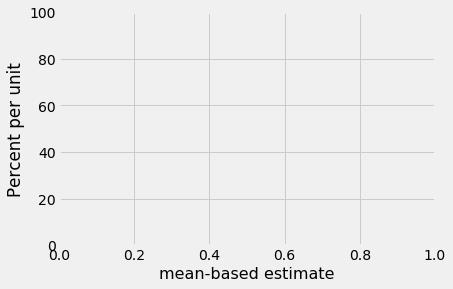

In [23]:
def simulate_estimates(original_table, sample_size, statistic, num_replications):
    # Our implementation of this function took 5 short lines of code.
    st=[]
    for _ in np.arange(num_replications):
        st=np.append(st,statistic(original_table.sample(k=sample_size,with_replacement=True).column("serial number")))
    return(st)

# This should generate an empirical histogram of twice-mean estimates
# of N from samples of size 50 if N is 1000.  This should be a bell-shaped
# curve centered at 1000 with most of its mass in [800, 1200].  To verify your
# answer, make sure that's what you see!
example_estimates = simulate_estimates(
    Table().with_column("serial number", np.arange(1, 1000+1)),
    50,
    mean_based_estimator,
    10000)
Table().with_column("mean-based estimate", example_estimates).hist(bins=np.arange(0, 1500, 25))

Now we can go back to the sample we actually observed (the table `observations`) and estimate how much our mean-based estimate of `N` would have varied from sample to sample.

#### Question 3.2
Using the bootstrap and the sample `observations`, simulate the approximate distribution of *mean-based estimates* of `N`.  Use 5,000 replications.  
We have provided code that plots a histogram, allowing you to visualize the simulated estimates.

118.11764705882354
90.23529411764706
135.64705882352942
106.47058823529412
140.35294117647058
129.2941176470588
125.76470588235294
119.76470588235294
131.64705882352942
111.05882352941177
106.94117647058823
121.76470588235294
160.35294117647058
98.0
88.3529411764706
115.76470588235294
123.29411764705883
107.52941176470588
109.29411764705883
107.29411764705883
118.0
134.47058823529412
110.94117647058823
132.94117647058823
107.41176470588235
120.70588235294117
121.29411764705883
115.17647058823529
110.23529411764706
97.17647058823529
128.94117647058823
88.58823529411765
112.82352941176471
137.88235294117646
116.3529411764706
129.41176470588235
133.41176470588235
122.23529411764706
121.05882352941177
144.47058823529412
145.41176470588235
121.05882352941177
106.3529411764706
113.29411764705883
136.0
128.47058823529412
119.52941176470588
119.88235294117646
94.70588235294117
106.23529411764706
95.6470588235294
100.70588235294117
112.47058823529412
127.17647058823529
107.52941176470588
138.0


112.23529411764706
111.88235294117646
111.29411764705883
137.2941176470588
168.58823529411765
152.7058823529412
138.47058823529412
103.52941176470588
100.70588235294117
154.23529411764707
127.41176470588235
112.70588235294117
115.41176470588235
144.8235294117647
117.05882352941177
106.58823529411765
107.05882352941177
132.23529411764707
135.52941176470588
149.1764705882353
145.1764705882353
116.3529411764706
144.35294117647058
119.6470588235294
137.52941176470588
135.52941176470588
103.76470588235294
101.41176470588235
145.52941176470588
96.82352941176471
106.94117647058823
120.3529411764706
132.94117647058823
115.52941176470588
102.58823529411765
129.52941176470588
130.8235294117647
90.11764705882354
124.11764705882354
123.17647058823529
128.94117647058823
130.7058823529412
144.35294117647058
126.11764705882354
110.70588235294117
135.88235294117646
130.94117647058823
120.70588235294117
135.2941176470588
118.94117647058823
114.11764705882354
122.94117647058823
127.17647058823529
125.29

104.70588235294117
150.11764705882354
146.7058823529412
113.52941176470588
158.58823529411765
126.0
113.88235294117646
139.52941176470588
139.64705882352942
122.23529411764706
137.05882352941177
121.76470588235294
140.94117647058823
120.58823529411765
113.17647058823529
143.1764705882353
109.41176470588235
108.3529411764706
141.88235294117646
121.05882352941177
112.94117647058823
139.52941176470588
124.94117647058823
114.23529411764706
116.11764705882354
112.70588235294117
105.88235294117646
132.23529411764707
136.8235294117647
127.41176470588235
130.0
116.0
110.0
132.23529411764707
131.1764705882353
129.64705882352942
131.88235294117646
136.58823529411765
136.11764705882354
115.29411764705883
115.76470588235294
145.41176470588235
133.41176470588235
94.58823529411765
106.70588235294117
126.3529411764706
137.41176470588235
106.11764705882354
115.17647058823529
102.11764705882354
114.94117647058823
142.7058823529412
146.11764705882354
105.29411764705883
106.82352941176471
140.23529411764

115.6470588235294
127.41176470588235
123.29411764705883
137.52941176470588
120.23529411764706
97.6470588235294
129.88235294117646
122.58823529411765
96.0
120.70588235294117
114.47058823529412
119.29411764705883
118.3529411764706
130.58823529411765
115.88235294117646
134.47058823529412
111.05882352941177
130.7058823529412
130.11764705882354
123.41176470588235
135.64705882352942
115.29411764705883
125.88235294117646
133.64705882352942
97.17647058823529
149.41176470588235
101.76470588235294
122.3529411764706
122.94117647058823
148.23529411764707
130.7058823529412
133.52941176470588
141.52941176470588
136.23529411764707
154.58823529411765
94.70588235294117
116.82352941176471
153.76470588235293
123.29411764705883
111.76470588235294
139.1764705882353
107.05882352941177
131.76470588235293
123.88235294117646
112.70588235294117
114.58823529411765
129.88235294117646
113.17647058823529
101.05882352941177
114.0
123.29411764705883
104.70588235294117
108.70588235294117
121.52941176470588
134.1176470

102.0
108.94117647058823
119.52941176470588
127.76470588235294
141.2941176470588
131.41176470588235
125.88235294117646
133.52941176470588
109.88235294117646
156.47058823529412
128.7058823529412
130.11764705882354
115.41176470588235
100.11764705882354
104.94117647058823
107.29411764705883
113.52941176470588
123.05882352941177
126.58823529411765
111.17647058823529
116.94117647058823
95.17647058823529
110.70588235294117
110.23529411764706
130.47058823529412
136.11764705882354
115.41176470588235
112.94117647058823
129.88235294117646
117.6470588235294
122.58823529411765
153.64705882352942
145.88235294117646
124.47058823529412
107.52941176470588
114.3529411764706
138.8235294117647
129.1764705882353
160.94117647058823
107.41176470588235
107.05882352941177
147.1764705882353
96.0
102.82352941176471
111.41176470588235
133.64705882352942
142.11764705882354
126.0
119.52941176470588
117.05882352941177
102.23529411764706
104.58823529411765
108.3529411764706
105.05882352941177
139.88235294117646
120.

115.88235294117646
86.0
116.58823529411765
120.3529411764706
151.05882352941177
151.52941176470588
108.11764705882354
152.58823529411765
130.7058823529412
130.8235294117647
128.23529411764707
115.17647058823529
129.1764705882353
90.58823529411765
116.0
134.47058823529412
116.82352941176471
118.58823529411765
113.6470588235294
140.7058823529412
127.76470588235294
121.88235294117646
132.35294117647058
123.17647058823529
102.94117647058823
123.29411764705883
123.41176470588235
96.47058823529412
135.88235294117646
130.94117647058823
151.2941176470588
112.70588235294117
143.05882352941177
119.41176470588235
124.70588235294117
122.23529411764706
122.3529411764706
130.47058823529412
126.47058823529412
127.52941176470588
137.41176470588235
105.17647058823529
100.23529411764706
113.88235294117646
90.94117647058823
120.11764705882354
105.17647058823529
94.58823529411765
128.35294117647058
120.23529411764706
106.11764705882354
115.52941176470588
116.23529411764706
110.0
124.23529411764706
137.764

125.52941176470588
118.70588235294117
144.35294117647058
105.05882352941177
101.52941176470588
127.41176470588235
123.76470588235294
127.6470588235294
114.82352941176471
120.3529411764706
105.76470588235294
137.41176470588235
114.0
120.47058823529412
119.41176470588235
96.3529411764706
127.05882352941177
114.94117647058823
110.70588235294117
116.3529411764706
119.29411764705883
114.23529411764706
101.41176470588235
110.47058823529412
120.3529411764706
106.70588235294117
132.8235294117647
125.6470588235294
111.17647058823529
124.11764705882354
95.76470588235294
128.8235294117647
155.64705882352942
99.17647058823529
123.05882352941177
114.70588235294117
132.8235294117647
133.52941176470588
123.88235294117646
122.0
115.05882352941177
106.23529411764706
142.11764705882354
120.70588235294117
166.11764705882354
143.88235294117646
133.1764705882353
165.2941176470588
128.7058823529412
131.76470588235293
126.3529411764706
130.47058823529412
110.47058823529412
127.29411764705883
145.411764705882

124.47058823529412
127.76470588235294
114.70588235294117
109.76470588235294
128.35294117647058
123.88235294117646
114.70588235294117
113.52941176470588
105.76470588235294
93.88235294117646
98.3529411764706
98.58823529411765
106.82352941176471
109.17647058823529
125.17647058823529
111.29411764705883
113.05882352941177
130.7058823529412
114.23529411764706
131.1764705882353
141.88235294117646
110.23529411764706
130.7058823529412
122.94117647058823
121.05882352941177
110.94117647058823
102.47058823529412
115.41176470588235
125.17647058823529
110.0
127.52941176470588
120.47058823529412
121.17647058823529
110.3529411764706
127.52941176470588
114.0
135.1764705882353
134.47058823529412
128.0
113.41176470588235
115.29411764705883
114.47058823529412
112.47058823529412
111.41176470588235
126.0
122.0
109.29411764705883
120.70588235294117
133.1764705882353
133.88235294117646
125.05882352941177
129.05882352941177
125.17647058823529
135.88235294117646
116.3529411764706
146.47058823529412
144.94117647

97.17647058823529
145.76470588235293
144.0
124.23529411764706
106.11764705882354
115.76470588235294
139.2941176470588
105.17647058823529
118.70588235294117
130.7058823529412
125.41176470588235
115.05882352941177
122.23529411764706
120.23529411764706
120.0
126.11764705882354
133.1764705882353
121.17647058823529
154.35294117647058
129.64705882352942
128.7058823529412
136.11764705882354
160.7058823529412
103.41176470588235
119.88235294117646
124.94117647058823
109.29411764705883
133.41176470588235
122.3529411764706
123.52941176470588
119.88235294117646
102.11764705882354
133.52941176470588
128.23529411764707
120.0
133.1764705882353
114.3529411764706
139.05882352941177
105.52941176470588
121.17647058823529
143.41176470588235
111.76470588235294
108.94117647058823
108.11764705882354
119.76470588235294
114.70588235294117
134.35294117647058
151.1764705882353
134.23529411764707
108.58823529411765
124.82352941176471
105.76470588235294
99.05882352941177
119.52941176470588
127.41176470588235


ValueError: color kwarg must have one color per dataset

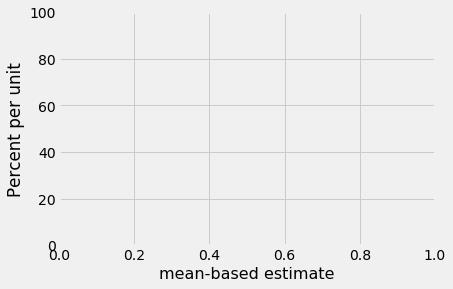

In [25]:
bootstrap_estimates = simulate_estimates(observations,num_observations,mean_based_estimator,5000)
test = Table().with_column("mean-based estimate", bootstrap_estimates)
test.hist(bins=np.arange(0, 200, 4)) 

#### Question 3.3
Compute an interval that covers the middle 95% of the bootstrap estimates.  Verify that your interval looks like it covers 95% of the area in the histogram above.

In [33]:
left_end = percentile(2.5,bootstrap_estimates)
right_end = percentile(97.5,bootstrap_estimates)
print("Middle 95% of bootstrap estimates: [{:f}, {:f}]".format(left_end, right_end))

TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

#### Question 3.4
Your mean-based estimate of `N` should have been around 122. Given the above calculations, is it likely that `N` is exactly 122? If not, what is the typical range of values of the mean-based estimates of `N` for samples of size 17?

Not likely that it is exactly 122. In 95% of samples of this sample size (17) the mean based estimate will be between the left_end and right_end calculated above.

Check your solutions with someone on the edX discussion forums

#### Question 3.5
`N` was actually 150!  Write code that simulates the sampling and bootstrapping process again, as follows:

1. Generate a new set of random observations by sampling from the population table we have created for you below. 
2. Compute an estimate of `N` from these new observations, using `mean_based_estimator`.
3. Using only the new observations, compute 5,000 bootstrap estimates of `N`.
4. Plot these bootstrap estimates and compute an interval covering the middle 95%.

In [ ]:
population = Table().with_column("serial number", np.arange(1, 150+1))

new_observations = population.sample(num_observations)
new_mean_based_estimate = simulate_estimates(new_observations,num_observations,mean_based_estimator,5000)
new_bootstrap_estimates = simulate_estimates(new_observations,num_observations,mean_based_estimator,5000)
Table().with_column('mean based estimate', new_bootstrap_estimates).hist(bins=np.arange(0,252,4))
new_left_end = percentile(2.5, new_bootstrap_estimates)
new_right_end = percentile(97.5, new_bootstrap_estimates)

print("New mean-based estimate: {:f}".format(new_mean_based_estimate))
print("Middle 95% of bootstrap estimates: [{:f}, {:f}]".format(new_left_end, new_right_end))

#### Question 3.6
Does the interval covering the middle 95% of the new bootstrap estimates include `N`?  If you ran that cell many times, what is the probability that it will include `N`?

When I did it it did. The probability it will include N is 0.95.

Check your solutions with someone on the edX discussion forums

## Submission

Conratulations! You're finished with lab 5 and Data 8.2x! In order to successfully submit your assignment, follow these steps...
- **IMPORTANT** Before you do anything, **Save and Checkpoint** from the `File` menu. Please do this first before running the cell below,
- **run all the tests and verify that they all pass** (the next cell has a shortcut for that), 
- **Review the notebook one last time, we will be grading the final state of your notebook** If you make any changes, please **Save and Checkpoint** again.

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from okgrade.notebook import grade_notebook
if not globals().get('__OKGRADE__', False):
    display(grade_notebook('lab05.ipynb', sorted(glob.glob('tests/q*.py'))))